In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

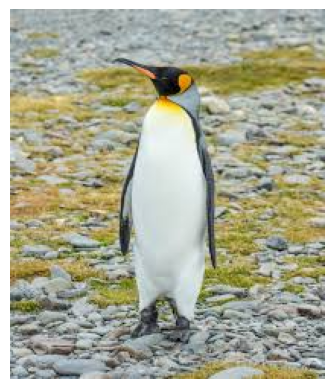

In [ ]:
## In OpenCV formatul de baza este BGR si nu RGB
image = cv2.imread('penguin.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

## Redimensionare

Dimensiune imagine normala:  (243, 207, 3)


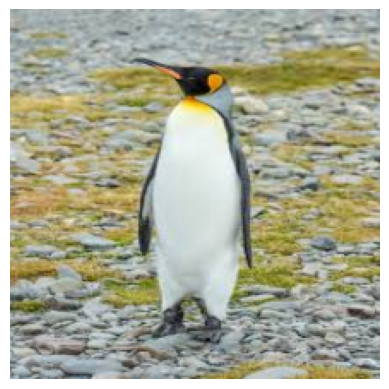

Dimensiune imagine redimensionata:  (216, 216, 3)


In [ ]:
print('Dimensiune imagine normala: ', image.shape)
resized_image = cv2.resize(image, (216, 216))
plt.imshow(resized_image)
plt.axis('off')
plt.show()
print('Dimensiune imagine redimensionata: ', resized_image.shape)

## Conversie la scara de gri

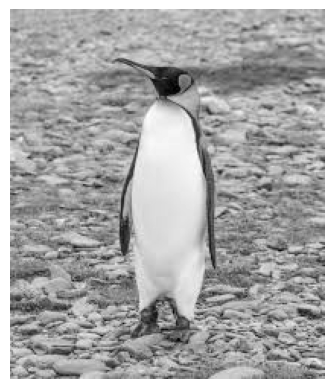

Dimensiune imagine nivel de gri:  (243, 207)


In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()
print('Dimensiune imagine nivel de gri: ', gray_image.shape)

## Normalizare

Gray Min:  0
Gray Max:  252


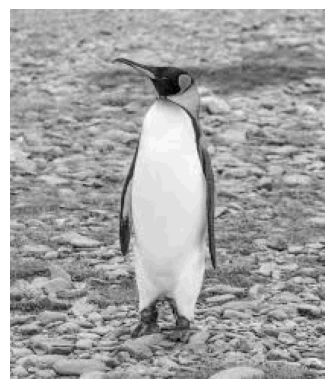

Normalized Min:  0
Normalized Max:  32


In [ ]:
print('Gray Min: ', gray_image.min())
print('Gray Max: ', gray_image.max())
normalized_image = cv2.normalize(gray_image, None, alpha=0, beta=32, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalized_image, cmap='gray')
plt.axis('off')
plt.show()
print('Normalized Min: ', normalized_image.min())
print('Normalized Max: ', normalized_image.max())

## Imagine fara zgomot

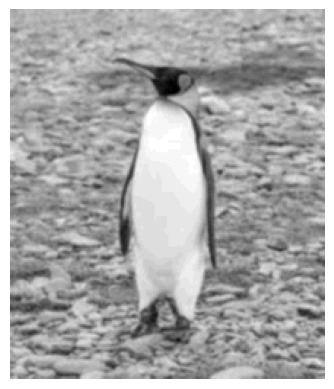

In [ ]:
denoised_image = cv2.GaussianBlur(normalized_image, (3, 3), 0)
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')
plt.show()

## Ajustare de contrast si luminozitate

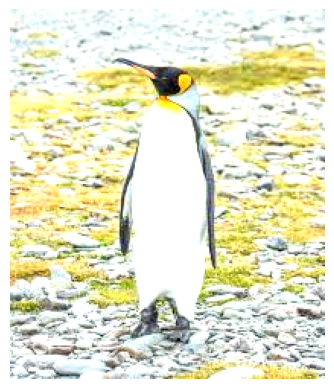

In [ ]:
contrast_factor = 1.5
contrast_image = cv2.convertScaleAbs(image, alpha=contrast_factor, beta=0)
plt.imshow(contrast_image, cmap='gray')
plt.axis('off')
plt.show()

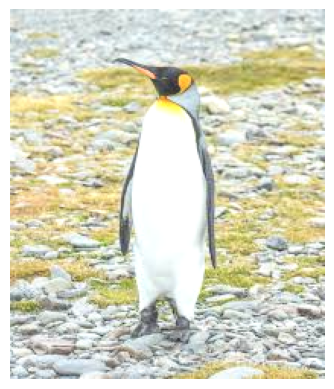

In [ ]:
brightness = 50
contrast_image = cv2.convertScaleAbs(image, alpha=1, beta=brightness)
plt.imshow(contrast_image, cmap='gray')
plt.axis('off')
plt.show()

## Binarizare

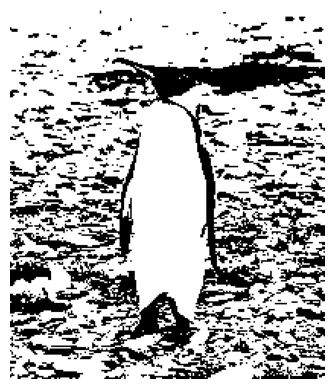

In [ ]:
_, binary_image = cv2.threshold(gray_image, 140, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

## Augmentare

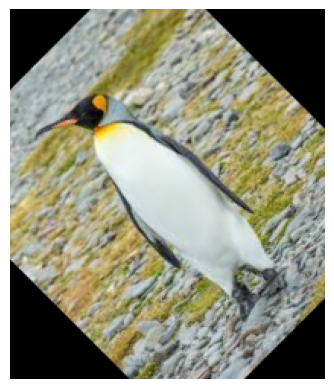

Dimensiune imagine rotita:  (243, 207, 3)


In [ ]:
height, width = image.shape[:2]

center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')
plt.show()
print('Dimensiune imagine rotita: ', rotated_image.shape)

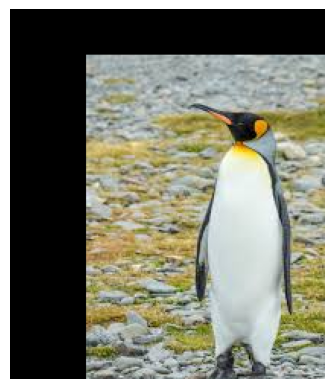

In [ ]:
## Translatie
translation_matrix = np.float32([[1, 0 ,50], [0, 1, 30]])
## Mutam cu 50 de pixeli pe axa oX si 30 pe axa oY

translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
plt.imshow(translated_image)
plt.axis('off')
plt.show()

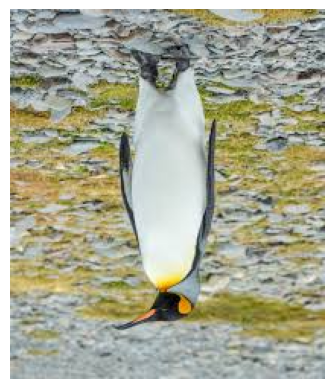

In [ ]:
## Oglindire
flipped_image = cv2.flip(image, 0) # 1 este pentru orizontala, 0 verticala
plt.imshow(flipped_image)
plt.axis('off')
plt.show()

## Detectarea muchiilor

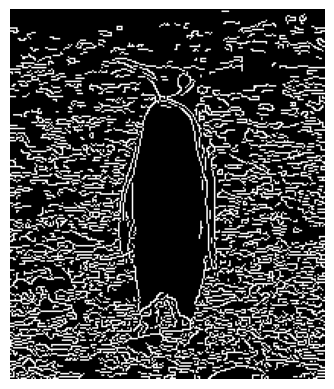

In [ ]:
edges = cv2.Canny(gray_image, 160, 220)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

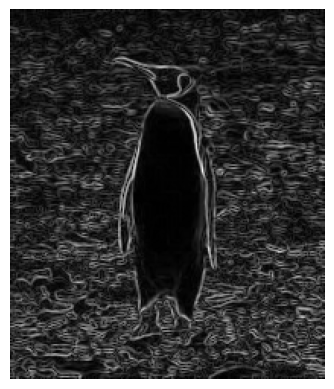

In [ ]:
## Sobel
## Valoarea gradientului pe axa Ox sau axa Oy indica schimbarea de informatie la nivel de axa pe imaginea respectiva
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

edges_sobel = cv2.magnitude(sobel_x, sobel_y)

plt.imshow(edges_sobel, cmap='gray')
plt.axis('off')
plt.show()